150


/home/ayushman/venv/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo : 100%


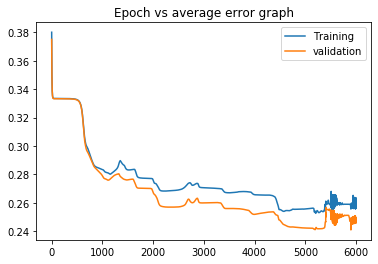

0.5666666666666667
0.5703703703703704


/home/ayushman/venv/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


In [60]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize

graphs_dir = 'nn_hidden/'
def spit(filename , class_no):
    f = open(filename)
    df = []
    i=0

    for line in f:
        l = line.split()
        l = [float(i) for i in l]
        df.append(l)
        i=i+1
    labels = []


    for i in range(len(df)):
        ll = [0]*3
        ll[class_no-1] = 1
        ll = np.array(ll)
        labels.append(ll)
    labels = np.array(labels)
    df = np.array(df)
    return df,labels
def logistic(a):
    return (1/(1+np.exp(-a)))


def relu(a):
    if a>0:
        return a
    else:
        return 0

def relu_derivative(a):
    if a>0:
        return 1
    else:
        return 0

def linear(a):
    return a

def logistic_derivative(a):
    return a*(1-a)

def tan_hyperbolic(a):
    None

def get_data(filename):
    data = np.genfromtxt(filename, delimiter=',')
    np.random.seed(42)
    np.random.shuffle(data)
    return data

def argm(vect):
    maxi = -1000
    ans = 0
    for i in range(len(vect)):

        if(vect[i][0]>maxi):
            ans = i
            maxi = vect[i][0]
    return ans

class Neural_Network():
    data = None
    layers = None
    weights = None
    del_weights = None
    activation = None
    activation_func = None
    biases = None
    MAX_EPOCH = 100
    learning_rate = 0.001
    data_x = None
    data_y = None
    def split_data(self):
        data_x = self.data_x
        data_y = self.data_y

        self.train_x = data_x[:int(len(data_x)*1),:]
        self.val_x = data_x[int(len(data_x)*0.1):int(len(data_x)*1),:]
        self.test_x = data_x[int(len(data_x)*0.1):,:]

        self.train_y = data_y[:int(len(data_y)*1),:]
        self.val_y = data_y[int(len(data_y)*0.1):int(len(data_y)*1),:]
        self.test_y = data_y[int(len(data_y)*0.1):,:]


    def predict(self, samples):
        predictions = []
        for i in range(len(samples)):
            self.activation[0] = np.reshape(samples[i], (samples[i].shape[0],1))
            self.forward_pass()
            predictions.append( self.activation[len(self.layers)])
        return predictions

    def construct(self, data_x,data_y, layers, activation_func):
        self.data_x = data_x
        self.data_y = data_y
        #input_dimen = data.shape[1]-1
        input_dimen = 32
        self.split_data()
        self.layers = layers
        self.weights = []
        self.del_weights = []
        self.biases = []
        self.activation_func = activation_func
        self.activation = [np.zeros((input_dimen, 1))]
        for i in range(len(layers)):
            self.activation.append(np.zeros((layers[i], 1)))
            self.biases.append(0.1*np.random.random((layers[i],1)))
            if i==0:
                self.weights.append(0.1*np.random.random((input_dimen, layers[i])))
                self.del_weights.append(0.1*np.random.random((input_dimen, layers[i])))
            else:
                self.weights.append(0.1*np.random.random((layers[i-1], layers[i])))
                self.del_weights.append(0.1*np.random.random((layers[i-1], layers[i])))

    def train(self):
        self.history=[]
        self.val_history=[]
        for i in range (self.MAX_EPOCH):
            percentage_done = i*100//self.MAX_EPOCH
            print('o'*(percentage_done) + '-'*(100-percentage_done), ": "+str(percentage_done)+"%",end='\r')

            av_error, val_av_error = self.epoch()
            self.history.append((i+1, av_error))
            self.val_history.append((i+1, val_av_error))
            if(len(self.history)>1 and self.history[i][1]==self.history[i-1][1]):
                break
            # doing node wise ananlysis
            if((i+1) % 500 == 0 ):
                for layer in range(len(self.layers)):
                    for node in range(self.layers[layer]):
                        #pass
                        self.node_wise_graph(node,layer,i)

        percentage_done = 100
        print('o'*(percentage_done) + '-'*(100-percentage_done), ": "+str(percentage_done)+"%",end='\r')
        print()

    def node_wise_graph(self, node, layer, e):
        outcomes = []
        for i in range(len(self.train_x)):
            self.activation[0] = np.reshape(self.train_x[i,:], (self.train_x[i,:].shape[0],1))
            self.true_value = np.reshape(self.train_y[i,:], (self.train_y[i,:].shape[0],1))
            self.forward_pass()
            outcomes.append(self.activation[layer+1][node][0])
        train_x = self.train_x
        ax = plt.axes(projection='3d')
        label = "Epoch"+str(e+1)+" Layer:"+str(layer+1)+" Node:"+str(node+1)
        ax.scatter3D(train_x[:,0], train_x[:,1], outcomes, label=label)
        ax.set_xlabel("Attr1")
        ax.set_ylabel("Attr2")
        ax.set_zlabel('Value')
        plt.legend()
        plt.savefig(graphs_dir+label+'.png')
        plt.close()
        

    def epoch(self):
        total_error = 0
        val_total_error =0 
        for i in range(len(self.train_x)):
            self.activation[0] = np.reshape(self.train_x[i,:], (self.train_x[i,:].shape[0],1))
            self.true_value = np.reshape(self.train_y[i,:], (self.train_y[i,:].shape[0],1))
            #print(self.true_value)
            #print(self.activation[-1])
            self.forward_pass()
            instaneous_error = 0.5*np.sum((self.true_value - self.activation[-1])**2)
            total_error += instaneous_error
            self.backward_pass()

        for i in range(len(self.val_x)):
            self.activation[0] = np.reshape(self.val_x[i,:], (self.val_x[i,:].shape[0],1))
            self.true_value = np.reshape(self.val_y[i,:], (self.val_y[i,:].shape[0],1))
            self.forward_pass()
            instaneous_error = 0.5*np.sum((self.true_value - self.activation[-1])**2)
            val_total_error += instaneous_error
        
        av_error = total_error/len(self.train_x)
        val_av_error = val_total_error/len(self.val_x)
        return av_error, val_av_error

    def forward_pass(self):
        for i in range(len(self.layers)):
            self.forward_propagation_layer(i)
            
    
    def forward_propagation_layer(self, current_layer):
        self.activation[current_layer+1] = np.matmul(self.weights[current_layer].T, self.activation[current_layer])
        self.activation[current_layer+1] += self.biases[current_layer]
        for i in range(len(self.activation[current_layer+1])):
            # print(self.activation[current_layer+1][i],end=' ')
            #print("current_layer" , current_layer)
            #print("i",i)
            self.activation[current_layer+1][i] = self.activation_func[current_layer](self.activation[current_layer+1][i])
            # print(self.activation[current_layer+1][i])

    def backward_pass(self):
        for i in range(len(self.layers)-1, -1, -1):
            self.backward_propagation_layer(i)

    def backward_propagation_layer(self, current_layer):
        if current_layer == len(self.layers)-1:
            self.kronicker_delta = (self.true_value - self.activation[current_layer+1])    
        else:
            self.kronicker_delta = np.matmul(self.cache_weights, self.kronicker_delta)

        if self.activation_func[current_layer] == logistic:
            self.kronicker_delta *= logistic_derivative(self.activation[current_layer+1])
        elif self.activation_func[current_layer] == linear:
            self.kronicker_delta *= 1
        elif self.activation_func == tan_hyperbolic:
            self.kronicker_delta *= tan_hyperbolic_derivative(self.activation[current_layer+1])
        elif self.activation_func == relu:
            self.kronicker_delta *= relu_derivative(self.activation[current_layer+1])


        self.del_weights[current_layer] = self.learning_rate * np.matmul(self.activation[current_layer] ,self.kronicker_delta.T)
        self.cache_weights = self.weights[current_layer]
        self.weights[current_layer] += self.del_weights[current_layer]
        self.biases[current_layer] += self.learning_rate * self.kronicker_delta
    
    def train_prediction_graph(self):
        train_x = self.train_x
        train_y = self.train_y
        train_pred = self.predict(train_x)
        ax = plt.axes(projection='3d')
        ax.scatter3D(train_x[:,0], train_x[:,1], train_y, label='Actual')
        ax.scatter3D(train_x[:,0], train_x[:,1], train_pred, label = "Predicted")
        plt.title("Training")
        ax.set_xlabel("Attr1")
        ax.set_ylabel("Attr2")
        ax.set_zlabel('Value')
        plt.legend()
        plt.savefig(graphs_dir+'dist_train.png')
        plt.close()

    def val_prediction_graph(self):
        val_x = self.val_x
        val_y = self.val_y
        val_pred = self.predict(val_x)
        ax = plt.axes(projection='3d')
        ax.scatter3D(val_x[:,0], val_x[:,1], val_y, label='Actual')
        ax.scatter3D(val_x[:,0], val_x[:,1], val_pred, label = "Predicted")
        plt.title("validation")
        ax.set_xlabel("Attr1")
        ax.set_ylabel("Attr2")
        ax.set_zlabel('Value')
        plt.legend()
        plt.savefig(graphs_dir+'dist_val.png')
        plt.close()

    def test_prediction_graph(self):
        test_x = self.test_x
        test_y = self.test_y
        test_pred = self.predict(test_x)
        ax = plt.axes(projection='3d')
        ax.scatter3D(test_x[:,0], test_x[:,1], test_y, label='Actual')
        ax.scatter3D(test_x[:,0], test_x[:,1], test_pred, label = "Predicted")
        plt.title("testing")
        ax.set_xlabel("Attr1")
        ax.set_ylabel("Attr2")
        ax.set_zlabel('Value')
        plt.legend()
        plt.savefig(graphs_dir+'dist_test.png')
        plt.close()
    
    def train_vs_prediction_graph(self):
        train_pred = self.predict(self.train_x)
        plt.scatter(self.train_y, train_pred)
        plt.title("Training Dataset")
        plt.savefig(graphs_dir+'actual_vs_pred_train.png')
        plt.close()

    def val_vs_prediction_graph(self):
        val_pred = self.predict(self.val_x)
        plt.scatter(self.val_y, val_pred)
        plt.title("Val Dataset")
        plt.savefig(graphs_dir+'actual_vs_pred_val.png')
        plt.close()

    def test_vs_prediction_graph(self):
        test_pred = self.predict(self.test_x)
        plt.scatter(self.test_y, test_pred)
        plt.title("Test Dataset")
        plt.savefig(graphs_dir+'actual_vs_pred_test.png')
        plt.close()
    
    def train_check(self):
        out = model.predict(self.train_x)
        out = np.array(out)
        #print(out)
        for i in range(len(out)):
            temp = out[i]
            temp_sum = temp.sum()
            for j in range(len(temp)):
                temp[j][0] = temp[j][0] / temp_sum
            out[i] = temp 

        #print(out)
        output = []
        for i in range(len(out)):
            temp = out[i]
            tt = np.zeros(len(out[0]))

            tt[argm(temp)] = 1

            output.append(tt)
        def onehot2class(onehot):
            l = []
            for val in onehot:
                for i in range(len(val)):
                    if(val[i]==1):
                        l.append(i+1)
            return l
        output = np.array(output)
        output = onehot2class(output)
        true = onehot2class(self.train_y)
        return output,true
    
    def test_check(self):
        out = model.predict(self.test_x)
        out = np.array(out)
        #print(out)
        for i in range(len(out)):
            temp = out[i]
            temp_sum = temp.sum()
            for j in range(len(temp)):
                temp[j][0] = temp[j][0] / temp_sum
            out[i] = temp 

        
        output = []
        
        for i in range(len(out)):
            temp = out[i]
            tt = np.zeros(len(out[0]))

            tt[argm(temp)] = 1

            output.append(tt)
        
        def onehot2class(onehot):
            l = []
            for val in onehot:
                for i in range(len(val)):
                    if(val[i]==1):
                        l.append(i+1)
            return l
        output = np.array(output)
        output = onehot2class(output)
        true = onehot2class(self.test_y)
        return output,true
    
    
    
    def classify(self,sample_x):
        out = model.predict(sample_x)
        out = np.array(out)
        #print(out)
        for i in range(len(out)):
            temp = out[i]
            temp_sum = temp.sum()
            for j in range(len(temp)):
                temp[j][0] = temp[j][0] / temp_sum
            out[i] = temp 

        #print(out)
        output = []
        for i in range(len(out)):
            temp = out[i]
            tt = np.zeros(len(out[0]))

            tt[argm(temp)] = 1

            output.append(tt)
        def onehot2class(onehot):
            l = []
            for val in onehot:
                for i in range(len(val)):
                    if(val[i]==1):
                        l.append(i+1)
            return l
        output = np.array(output)
        output = onehot2class(output)

        return output
    
    
        
        

data_x1 , data_y1 = spit('c1.txt',1)
data_x2 , data_y2 = spit('c2.txt',2)
data_x3 , data_y3 = spit('c3.txt',3)
data_x = np.concatenate((data_x1,data_x2,data_x3) , axis=0)
data_y = np.concatenate((data_y1 , data_y2 , data_y3) , axis=0)

indices = np.arange(data_x.shape[0])
np.random.shuffle(indices)
normalize(data_x,axis=0)

data_x = data_x[indices]
data_y = data_y[indices]
print(len(data_x))

model = Neural_Network()
model.construct(data_x,data_y, [16,8,3], [relu,relu,logistic])
model.learning_rate = 0.01
model.MAX_EPOCH = 6000

model.train()


plt.plot([model.history[i][0] for i in range(len(model.history))], [model.history[i][1] for i in range(len(model.history))], label='Training')
plt.plot([model.history[i][0] for i in range(len(model.val_history))], [model.val_history[i][1] for i in range(len(model.val_history))], label='validation')
plt.title('Epoch vs average error graph')
plt.legend()
plt.savefig("NN-Epoch vs average error graph NLS")
plt.show()
a,b = model.train_check()
c,d = model.test_check()
def accuracy(a,b):
    hits=0
    for i in range(len(a)):
        if(a[i]==b[i]):
            hits = hits + 1
    return hits/len(a)

print(accuracy(a,b))
print(accuracy(c,d))


In [79]:
data_x1_t , data_y1_t = spit('c1.txt',1)
data_x2_t , data_y2_t = spit('c2.txt',2)
data_x3_t , data_y3_t = spit('c3.txt',3)
data_x_t = np.concatenate((data_x1_t,data_x2_t,data_x3_t) , axis=0)
data_y_t = np.concatenate((data_y1_t , data_y2_t , data_y3_t) , axis=0)
indices = np.arange(data_x_t.shape[0])
np.random.shuffle(indices)
normalize(data_x_t,axis=0)

ou = model.classify(data_x_t)
tr = data_y_t


/home/ayushman/venv/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


In [80]:
def accuracy(a,b):
    hits=0
    confusion = [[0,0,0],[0,0,0],[0,0,0]]
    
    for i in range(len(a)):
        confusion[a[i]-1][b[i]-1] += 1
        if(a[i]==b[i]):
            hits = hits + 1
    return hits/len(a),confusion
def onehot2class(onehot):
    l = []
    for val in onehot:
        for i in range(len(val)):
            if(val[i]==1):
                l.append(i+1)
    return l

In [81]:
tr = onehot2class(tr)
accuracy(tr,ou)

(0.5666666666666667, [[1, 45, 4], [0, 46, 4], [1, 11, 38]])